In [1]:
# Nama  : Avima Haamesha
# NIM   : 10219084

path: bandul.jpg
Compare BGR Intensity


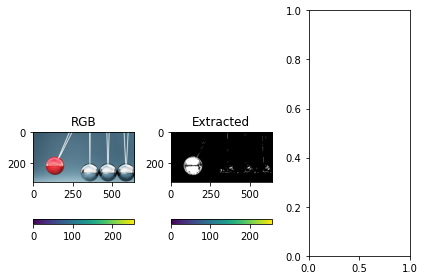

Done




In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os


# to reverse frame, so every frame will be contiuous
def reverse_playback(cap, frame_counter):
    frame_counter += 1

    if frame_counter == cap.get(cv.CAP_PROP_FRAME_COUNT):
        frame_counter = 0
        cap.set(cv.CAP_PROP_POS_FRAMES, 0)
    
    return cap, frame_counter


def cvt_gray(img, c_bgr=(0.114, 0.587, 0.299)):
    # create black img that have similar size to img
    w,h,c = img.shape
    img_gray = np.zeros( (w,h) )
    
    # extract 3 channel: bgr
    img_b, img_g, img_r = img[:,:,0], img[:,:,1], img[:,:,2]
    
    # convert bgr channel to gray
    for i in range(w):
        for j in range(h):
            img_gray[i,j]   = c_bgr[0] * img_b[i,j] \
                            + c_bgr[1] * img_g[i,j] \
                            + c_bgr[2] * img_r[i,j]
    return img_gray


def extract_color(img, lower=[0,0,0], upper=[0,0,0]):
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    lower, upper = np.array(lower), np.array(upper)
    mask = cv.inRange(hsv, lower, upper)

    # extracted = mask.copy()

    return mask


def func_process(path="mg08_uts/bandul.jpg"):
    # read img in rgb color space
    img = cv.imread(path)

    extracted = extract_color(img, lower=[127,0,0], upper=[255,255,255])
    
    # compare every channel intensity
    print("Compare BGR Intensity")
    plt.subplots(nrows=1, ncols=3, tight_layout=1)
    plt.subplot(1,3,1); plt.imshow( cv.cvtColor(img      , cv.COLOR_BGR2RGB) ); plt.title("RGB"); plt.colorbar(orientation="horizontal")
    plt.subplot(1,3,2); plt.imshow( cv.cvtColor(extracted, cv.COLOR_BGR2RGB) ); plt.title("Extracted"); plt.colorbar(orientation="horizontal")
    # plt.subplot(1,3,3); plt.imshow(); plt.title("--"); plt.colorbar(orientation="horizontal")
    plt.show()

    print("Done")


def play_video(path, isLoop=0):
    cap = cv.VideoCapture(path)

    frame_counter = 0       # used in reverse_playback()
    while True:
        # capture frame-by-frame
        ret, frame = cap.read()

        # if frame is read correctly, ret is True
        if (not ret):
            print("Can't receive frame (stream end?). Exiting ...")
            break
        
        # playback video by reset the frame_counter
        if isLoop:
            cap, frame_counter = reverse_playback(cap, frame_counter)
        
        fps = cap.get(cv.CAP_PROP_FPS)

        # show frame
        cv.imshow('frame', frame)
        # exit if "q" is pressed
        if (cv.waitKey(1) == ord('q')):
            break
    
    cap.release()
    cv.destroyAllWindows()


if __name__ == "__main__":
    folder_path = "./"
    path_arr = ["bandul.mp4"]
    
    for i in range(len(path_arr)):
        print("path: %s" %path_arr[i])
        path_arr[i] = os.path.join(folder_path, path_arr[i])
        func_process(path_arr[i])
        print("\n")